# Libraries to Import

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import pandas as pd

# Reading Dataset

In [3]:
series = read_csv('CPI_Urban_US_City_avg.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

# Plotting Series

DATE
1952-01-01    31.2
1952-02-01    30.7
1952-03-01    30.7
1952-04-01    30.8
1952-05-01    30.8
Name: CPI, dtype: float64


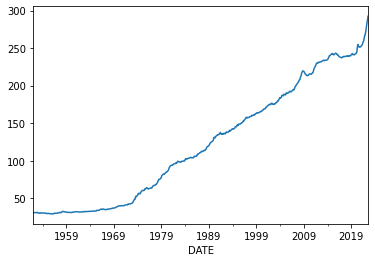

In [4]:
print(series.head())
series.plot()
pyplot.show()

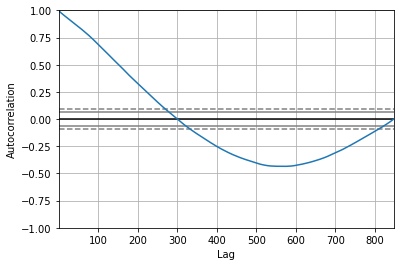

In [5]:
autocorrelation_plot(series)
pyplot.show()

# Splitting into Train and Test

In [6]:
series.index = series.index.to_period('M')
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Model Fitting and Training

In [7]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Predicted=%f, Actual=%f' % (yhat, obs))


predicted=161.078651, expected=161.400000
predicted=161.600544, expected=161.200000
predicted=161.277340, expected=162.500000
predicted=162.895553, expected=162.700000
predicted=162.938082, expected=162.800000
predicted=163.032899, expected=163.400000
predicted=163.664769, expected=163.800000
predicted=164.185951, expected=163.400000
predicted=163.412790, expected=163.600000
predicted=163.730553, expected=164.000000
predicted=164.206752, expected=163.900000
predicted=163.948832, expected=163.900000
predicted=163.892646, expected=164.100000
predicted=164.206692, expected=164.700000
predicted=164.937074, expected=165.100000
predicted=165.264415, expected=165.400000
predicted=165.594477, expected=165.500000
predicted=165.668653, expected=165.300000
predicted=165.399159, expected=166.100000
predicted=166.408924, expected=166.400000
predicted=166.573546, expected=166.600000
predicted=166.762749, expected=167.400000
predicted=167.707569, expected=167.500000
predicted=167.749438, expected=168

predicted=243.375334, expected=242.553000
predicted=242.707069, expected=242.598000
predicted=242.748395, expected=241.633000
predicted=241.386142, expected=241.106000
predicted=240.978556, expected=241.107000
predicted=240.882907, expected=241.922000
predicted=242.087351, expected=242.250000
predicted=242.272923, expected=242.864000
predicted=243.101803, expected=243.198000
predicted=243.440459, expected=243.284000
predicted=243.556426, expected=242.606000
predicted=242.512262, expected=241.880000
predicted=241.685644, expected=241.558000
predicted=241.351579, expected=241.741000
predicted=241.673502, expected=240.414000
predicted=239.853733, expected=240.341000
predicted=240.059489, expected=239.348000
predicted=238.847424, expected=238.763000
predicted=238.429081, expected=238.380000
predicted=237.878425, expected=238.133000
predicted=237.897026, expected=237.880000
predicted=237.558604, expected=237.714000
predicted=237.502641, expected=237.438000
predicted=237.238077, expected=237

# Test RMSE

In [8]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.763


# Plotting Actual and Predicted Results

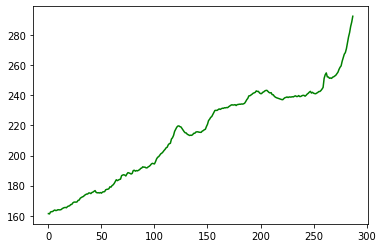

In [16]:
pyplot.plot(test,color='green')
pyplot.show()

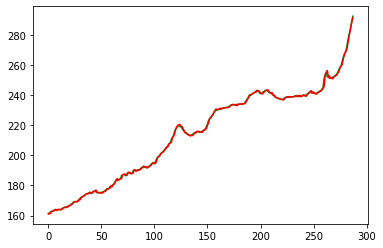

In [15]:
pyplot.plot(test,color='green')
pyplot.plot(predictions, color='red')
pyplot.show()